See https://doi.org/10.1029/2018JC014102

[ 0.          0.25252525  0.50505051  0.75757576  1.01010101  1.26262626
  1.51515152  1.76767677  2.02020202  2.27272727  2.52525253  2.77777778
  3.03030303  3.28282828  3.53535354  3.78787879  4.04040404  4.29292929
  4.54545455  4.7979798   5.05050505  5.3030303   5.55555556  5.80808081
  6.06060606  6.31313131  6.56565657  6.81818182  7.07070707  7.32323232
  7.57575758  7.82828283  8.08080808  8.33333333  8.58585859  8.83838384
  9.09090909  9.34343434  9.5959596   9.84848485 10.1010101  10.35353535
 10.60606061 10.85858586 11.11111111 11.36363636 11.61616162 11.86868687
 12.12121212 12.37373737 12.62626263 12.87878788 13.13131313 13.38383838
 13.63636364 13.88888889 14.14141414 14.39393939 14.64646465 14.8989899
 15.15151515 15.4040404  15.65656566 15.90909091 16.16161616 16.41414141
 16.66666667 16.91919192 17.17171717 17.42424242 17.67676768 17.92929293
 18.18181818 18.43434343 18.68686869 18.93939394 19.19191919 19.44444444
 19.6969697  19.94949495 20.2020202  20.45454545 20.

/tmp/ipykernel_20819/2508162299.py:10: RuntimeWarning: divide by zero encountered in divide
  cd = (2.7/u10 + .142 + .0764*u10 ) / 1000
/tmp/ipykernel_20819/2508162299.py:11: RuntimeWarning: invalid value encountered in multiply
  tau = rho_air*cd*u10**2


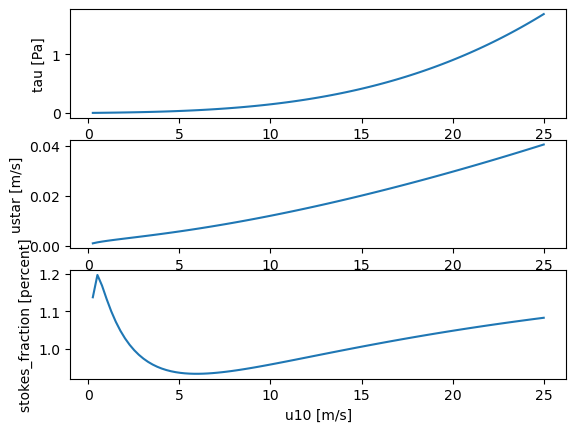

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

rho_air = 1.25
rho_water = 1028
u10 = np.linspace(0, 25, 100)
print(u10)

cd = (2.7/u10 + .142 + .0764*u10 ) / 1000
tau = rho_air*cd*u10**2
ustar = np.sqrt(tau/rho_water)
stokes = 4.4*ustar*np.log(0.0074*u10/ustar)
stokes_fraction = stokes/u10*100

ds = xr.Dataset(
        data_vars={
            'ustar': (['u10'], ustar, {'units': 'm/s'}),
            'tau': (['u10'], tau, {'units': 'Pa'}),
            'stokes_fraction': (['u10'], stokes_fraction, {'units': 'percent'})
            },
        coords={
            'u10': (['u10'], u10, {'units': 'm/s'})}
        )
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
ds.tau.plot(ax=ax1)
ds.ustar.plot(ax=ax2)
ds.stokes_fraction.plot(ax=ax3)